# PHBS_MLF_2023 Homework 2 - PCA/Hyperparameter/CV

In this homework, I will work on the [Give Me Some Credit](https://www.kaggle.com/competitions/GiveMeSomeCredit/data?select=cs-test.csv) dataset from Kaggle.

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("../data/cs-training.csv").iloc[:, 1:]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Model Building

### Logistic Regression

In [6]:
X = train_df.iloc[:, 1:].values
y = train_df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
pipeline_lr = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                        ('scaler', StandardScaler()),
                        ('pca', PCA()),
                        ('lr', LogisticRegression(penalty='l2', C=1.0, random_state=42))])

In [8]:
param_grid_lr = {'pca__n_components': [0.8, 0.85, 0.9, 0.95, 0.99],
                 'lr__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                 'lr__penalty': ['l1', 'l2', 'elasticnet']}

gs_lr = GridSearchCV(estimator=pipeline_lr,
                     param_grid=param_grid_lr,
                     scoring='f1',
                     cv=5,
                     refit=True,
                     n_jobs=-1,
                     verbose=2)

In [9]:
gs_lr = gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV] END .lr__C=0.001, lr__penalty=l1, pca__n_components=0.8; total time=   0.4s
[CV] END .lr__C=0.001, lr__penalty=l1, pca__n_components=0.8; total time=   0.4s
[CV] END .lr__C=0.001, lr__penalty=l1, pca__n_components=0.8; total time=   0.3s
[CV] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.85; total time=   0.1s
[CV] END .lr__C=0.001, lr__penalty=l1, pca__n_components=0.8; total time=   0.4s
[CV] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.85; total time=   0.1s
[CV] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.85; total time=   0.4s
[CV] END .lr__C=0.001, lr__penalty=l1, pca__n_components=0.9; total time=   0.1s
[CV] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.85; total time=   0.4s
[CV] END .lr__C=0.001, lr__penalty=l1, pca__n_components=0.9; total time=   0.1s
[CV] END .lr__C=0.001, lr__penalty=l1, pca__n_components=0.9; total time=   0.1s
[CV] END lr__C=0.001, lr__penalty=l1, pca__n_c

In [10]:
print("Highest f1 score: {}".format(gs_lr.best_score_))
print("Best parameters: {}".format(gs_lr.best_params_))

Highest f1 score: 0.02746898874162314
Best parameters: {'lr__C': 0.001, 'lr__penalty': 'l2', 'pca__n_components': 0.8}


In [11]:
proba_lr = gs_lr.predict_proba(X_test)[:, 1]

In [12]:
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, proba_lr)
auc_lr = metrics.auc(fpr_lr, tpr_lr)

### SVM

In [13]:
pipeline_svm = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                         ('scaler', StandardScaler()),
                         ('pca', PCA()),
                         ('svm', SVC(max_iter=50000, random_state=42, class_weight='balanced'))])

In [14]:
gamma_range = st.loguniform(1e-1, 1e1)
C_range = st.loguniform(1e-2, 1e2)

param_grid_svm = [{'pca__n_components': [0.8, 0.85, 0.9, 0.95, 0.99],
                   'svm__C': C_range,
                   'svm__kernel': ['rbf'],
                   'svm__gamma': ['scale']},
                  {'pca__n_components': [0.8, 0.85, 0.9, 0.95, 0.99],
                   'svm__C': C_range,
                   'svm__kernel': ['rbf'],
                   'svm__gamma': gamma_range}]

rs_svm = RandomizedSearchCV(estimator=pipeline_svm,
                            param_distributions=param_grid_svm,
                            scoring='f1',
                            cv=5,
                            refit=True,
                            n_jobs=-1,
                            verbose=3,
                            n_iter=50)

In [15]:
rs_svm = rs_svm.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 3/5] END pca__n_components=0.9, svm__C=0.4084491294916575, svm__gamma=0.17738801734367338, svm__kernel=rbf;, score=0.335 total time= 3.3min
[CV 3/5] END pca__n_components=0.85, svm__C=31.52141888516775, svm__gamma=scale, svm__kernel=rbf;, score=0.321 total time= 3.3min
[CV 1/5] END pca__n_components=0.9, svm__C=0.4084491294916575, svm__gamma=0.17738801734367338, svm__kernel=rbf;, score=0.338 total time= 3.3min
[CV 1/5] END pca__n_components=0.85, svm__C=31.52141888516775, svm__gamma=scale, svm__kernel=rbf;, score=0.331 total time= 3.3min
[CV 2/5] END pca__n_components=0.9, svm__C=0.4084491294916575, svm__gamma=0.17738801734367338, svm__kernel=rbf;, score=0.339 total time= 3.3min
[CV 2/5] END pca__n_components=0.85, svm__C=31.52141888516775, svm__gamma=scale, svm__kernel=rbf;, score=0.298 total time= 3.4min
[CV 5/5] END pca__n_components=0.85, svm__C=31.52141888516775, svm__gamma=scale, svm__kernel=rbf;, score=0.289 total time= 3.4min
[CV 4/5] END pca__n_components=0.85, svm__C=31.5

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 5/5] END pca__n_components=0.9, svm__C=0.4084491294916575, svm__gamma=0.17738801734367338, svm__kernel=rbf;, score=0.340 total time= 3.3min
[CV 4/5] END pca__n_components=0.9, svm__C=0.4084491294916575, svm__gamma=0.17738801734367338, svm__kernel=rbf;, score=0.350 total time= 3.3min
[CV 3/5] END pca__n_components=0.8, svm__C=0.2212426859968392, svm__gamma=3.795161697492403, svm__kernel=rbf;, score=0.322 total time= 3.3min
[CV 2/5] END pca__n_components=0.8, svm__C=0.2212426859968392, svm__gamma=3.795161697492403, svm__kernel=rbf;, score=0.324 total time= 3.3min
[CV 1/5] END pca__n_components=0.8, svm__C=0.2212426859968392, svm__gamma=3.795161697492403, svm__kernel=rbf;, score=0.328 total time= 3.3min
[CV 4/5] END pca__n_components=0.8, svm__C=0.2212426859968392, svm__gamma=3.795161697492403, svm__kernel=rbf;, score=0.332 total time= 3.3min
[CV 5/5] END pca__n_components=0.8, svm__C=0.2212426859968392, svm__gamma=3.795161697492403, svm__kernel=rbf;, score=0.324 total time= 3.3min
[C

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 1/5] END pca__n_components=0.8, svm__C=10.87159768225037, svm__gamma=1.843200146375293, svm__kernel=rbf;, score=0.320 total time= 3.3min
[CV 3/5] END pca__n_components=0.95, svm__C=0.2586232658000995, svm__gamma=scale, svm__kernel=rbf;, score=0.342 total time= 3.4min
[CV 2/5] END pca__n_components=0.95, svm__C=0.2586232658000995, svm__gamma=scale, svm__kernel=rbf;, score=0.340 total time= 3.4min
[CV 3/5] END pca__n_components=0.8, svm__C=10.87159768225037, svm__gamma=1.843200146375293, svm__kernel=rbf;, score=0.305 total time= 3.3min
[CV 4/5] END pca__n_components=0.95, svm__C=0.2586232658000995, svm__gamma=scale, svm__kernel=rbf;, score=0.342 total time= 3.4min
[CV 2/5] END pca__n_components=0.8, svm__C=10.87159768225037, svm__gamma=1.843200146375293, svm__kernel=rbf;, score=0.312 total time= 3.4min
[CV 5/5] END pca__n_components=0.95, svm__C=0.2586232658000995, svm__gamma=scale, svm__kernel=rbf;, score=0.341 total time= 3.4min
[CV 4/5] END pca__n_components=0.8, svm__C=10.8715976

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 3/5] END pca__n_components=0.85, svm__C=1.4626810577114366, svm__gamma=scale, svm__kernel=rbf;, score=0.334 total time= 3.2min
[CV 2/5] END pca__n_components=0.85, svm__C=1.4626810577114366, svm__gamma=scale, svm__kernel=rbf;, score=0.336 total time= 3.2min
[CV 1/5] END pca__n_components=0.85, svm__C=1.4626810577114366, svm__gamma=scale, svm__kernel=rbf;, score=0.337 total time= 3.2min
[CV 4/5] END pca__n_components=0.85, svm__C=1.4626810577114366, svm__gamma=scale, svm__kernel=rbf;, score=0.348 total time= 3.2min
[CV 5/5] END pca__n_components=0.85, svm__C=1.4626810577114366, svm__gamma=scale, svm__kernel=rbf;, score=0.338 total time= 3.2min
[CV 5/5] END pca__n_components=0.8, svm__C=10.87159768225037, svm__gamma=1.843200146375293, svm__kernel=rbf;, score=0.312 total time= 3.3min
[CV 1/5] END pca__n_components=0.99, svm__C=0.12446331453906231, svm__gamma=scale, svm__kernel=rbf;, score=0.330 total time= 3.4min
[CV 2/5] END pca__n_components=0.99, svm__C=0.12446331453906231, svm__ga

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 1/5] END pca__n_components=0.8, svm__C=0.8961368412741487, svm__gamma=0.6524202511698287, svm__kernel=rbf;, score=0.327 total time= 3.2min
[CV 3/5] END pca__n_components=0.8, svm__C=0.8961368412741487, svm__gamma=0.6524202511698287, svm__kernel=rbf;, score=0.321 total time= 3.2min
[CV 2/5] END pca__n_components=0.8, svm__C=0.8961368412741487, svm__gamma=0.6524202511698287, svm__kernel=rbf;, score=0.323 total time= 3.2min
[CV 3/5] END pca__n_components=0.99, svm__C=0.12446331453906231, svm__gamma=scale, svm__kernel=rbf;, score=0.333 total time= 3.4min
[CV 5/5] END pca__n_components=0.99, svm__C=0.12446331453906231, svm__gamma=scale, svm__kernel=rbf;, score=0.334 total time= 3.4min
[CV 4/5] END pca__n_components=0.99, svm__C=0.12446331453906231, svm__gamma=scale, svm__kernel=rbf;, score=0.329 total time= 3.4min
[CV 4/5] END pca__n_components=0.8, svm__C=0.8961368412741487, svm__gamma=0.6524202511698287, svm__kernel=rbf;, score=0.334 total time= 3.2min
[CV 5/5] END pca__n_components=0

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 1/5] END pca__n_components=0.95, svm__C=0.9898358850194187, svm__gamma=0.38235695689098037, svm__kernel=rbf;, score=0.331 total time= 3.3min
[CV 3/5] END pca__n_components=0.95, svm__C=0.9898358850194187, svm__gamma=0.38235695689098037, svm__kernel=rbf;, score=0.327 total time= 3.4min
[CV 2/5] END pca__n_components=0.95, svm__C=0.9898358850194187, svm__gamma=0.38235695689098037, svm__kernel=rbf;, score=0.324 total time= 3.4min
[CV 4/5] END pca__n_components=0.95, svm__C=0.9898358850194187, svm__gamma=0.38235695689098037, svm__kernel=rbf;, score=0.341 total time= 3.4min
[CV 5/5] END pca__n_components=0.95, svm__C=0.9898358850194187, svm__gamma=0.38235695689098037, svm__kernel=rbf;, score=0.328 total time= 3.4min
[CV 1/5] END pca__n_components=0.95, svm__C=0.2832254923697065, svm__gamma=scale, svm__kernel=rbf;, score=0.339 total time= 3.4min
[CV 2/5] END pca__n_components=0.95, svm__C=0.2832254923697065, svm__gamma=scale, svm__kernel=rbf;, score=0.340 total time= 3.4min
[CV 3/5] END 

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 1/5] END pca__n_components=0.9, svm__C=0.02899665673477955, svm__gamma=scale, svm__kernel=rbf;, score=0.249 total time= 3.3min
[CV 4/5] END pca__n_components=0.95, svm__C=0.2832254923697065, svm__gamma=scale, svm__kernel=rbf;, score=0.345 total time= 3.4min
[CV 2/5] END pca__n_components=0.9, svm__C=0.02899665673477955, svm__gamma=scale, svm__kernel=rbf;, score=0.266 total time= 3.3min
[CV 5/5] END pca__n_components=0.95, svm__C=0.2832254923697065, svm__gamma=scale, svm__kernel=rbf;, score=0.344 total time= 3.4min
[CV 3/5] END pca__n_components=0.9, svm__C=0.02899665673477955, svm__gamma=scale, svm__kernel=rbf;, score=0.284 total time= 3.3min
[CV 4/5] END pca__n_components=0.9, svm__C=0.02899665673477955, svm__gamma=scale, svm__kernel=rbf;, score=0.269 total time= 3.3min
[CV 1/5] END pca__n_components=0.85, svm__C=4.871006211816912, svm__gamma=scale, svm__kernel=rbf;, score=0.333 total time= 3.2min
[CV 5/5] END pca__n_components=0.9, svm__C=0.02899665673477955, svm__gamma=scale, sv

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 2/5] END pca__n_components=0.85, svm__C=4.871006211816912, svm__gamma=scale, svm__kernel=rbf;, score=0.335 total time= 3.2min
[CV 3/5] END pca__n_components=0.85, svm__C=4.871006211816912, svm__gamma=scale, svm__kernel=rbf;, score=0.331 total time= 3.2min
[CV 5/5] END pca__n_components=0.85, svm__C=4.871006211816912, svm__gamma=scale, svm__kernel=rbf;, score=0.330 total time= 3.2min
[CV 4/5] END pca__n_components=0.85, svm__C=4.871006211816912, svm__gamma=scale, svm__kernel=rbf;, score=0.343 total time= 3.3min
[CV 1/5] END pca__n_components=0.85, svm__C=0.36582368300163093, svm__gamma=0.13795079573858057, svm__kernel=rbf;, score=0.335 total time= 3.2min
[CV 2/5] END pca__n_components=0.85, svm__C=0.36582368300163093, svm__gamma=0.13795079573858057, svm__kernel=rbf;, score=0.338 total time= 3.2min
[CV 3/5] END pca__n_components=0.85, svm__C=0.36582368300163093, svm__gamma=0.13795079573858057, svm__kernel=rbf;, score=0.332 total time= 3.2min
[CV 4/5] END pca__n_components=0.85, svm__

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 5/5] END pca__n_components=0.85, svm__C=0.36582368300163093, svm__gamma=0.13795079573858057, svm__kernel=rbf;, score=0.345 total time= 3.2min
[CV 1/5] END pca__n_components=0.9, svm__C=0.0887896548776321, svm__gamma=scale, svm__kernel=rbf;, score=0.308 total time= 3.3min
[CV 3/5] END pca__n_components=0.9, svm__C=0.0887896548776321, svm__gamma=scale, svm__kernel=rbf;, score=0.308 total time= 3.3min
[CV 1/5] END pca__n_components=0.8, svm__C=0.04326284392758757, svm__gamma=0.3807440596403437, svm__kernel=rbf;, score=0.303 total time= 3.2min
[CV 2/5] END pca__n_components=0.9, svm__C=0.0887896548776321, svm__gamma=scale, svm__kernel=rbf;, score=0.322 total time= 3.3min
[CV 4/5] END pca__n_components=0.9, svm__C=0.0887896548776321, svm__gamma=scale, svm__kernel=rbf;, score=0.320 total time= 3.3min
[CV 5/5] END pca__n_components=0.9, svm__C=0.0887896548776321, svm__gamma=scale, svm__kernel=rbf;, score=0.308 total time= 3.3min
[CV 2/5] END pca__n_components=0.8, svm__C=0.043262843927587

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 3/5] END pca__n_components=0.8, svm__C=0.04326284392758757, svm__gamma=0.3807440596403437, svm__kernel=rbf;, score=0.308 total time= 3.2min
[CV 4/5] END pca__n_components=0.8, svm__C=0.04326284392758757, svm__gamma=0.3807440596403437, svm__kernel=rbf;, score=0.320 total time= 3.2min
[CV 5/5] END pca__n_components=0.8, svm__C=0.04326284392758757, svm__gamma=0.3807440596403437, svm__kernel=rbf;, score=0.299 total time= 3.2min
[CV 3/5] END pca__n_components=0.85, svm__C=1.001937818764558, svm__gamma=scale, svm__kernel=rbf;, score=0.333 total time= 3.2min
[CV 1/5] END pca__n_components=0.85, svm__C=1.001937818764558, svm__gamma=scale, svm__kernel=rbf;, score=0.333 total time= 3.3min
[CV 2/5] END pca__n_components=0.85, svm__C=1.001937818764558, svm__gamma=scale, svm__kernel=rbf;, score=0.336 total time= 3.3min
[CV 4/5] END pca__n_components=0.85, svm__C=1.001937818764558, svm__gamma=scale, svm__kernel=rbf;, score=0.346 total time= 3.2min
[CV 5/5] END pca__n_components=0.85, svm__C=1.00

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 1/5] END pca__n_components=0.8, svm__C=0.2113696396263812, svm__gamma=0.425919070826795, svm__kernel=rbf;, score=0.332 total time= 3.1min
[CV 2/5] END pca__n_components=0.8, svm__C=0.2113696396263812, svm__gamma=0.425919070826795, svm__kernel=rbf;, score=0.332 total time= 3.1min
[CV 3/5] END pca__n_components=0.8, svm__C=0.2113696396263812, svm__gamma=0.425919070826795, svm__kernel=rbf;, score=0.330 total time= 3.1min
[CV 4/5] END pca__n_components=0.8, svm__C=0.2113696396263812, svm__gamma=0.425919070826795, svm__kernel=rbf;, score=0.337 total time= 3.1min
[CV 5/5] END pca__n_components=0.8, svm__C=0.2113696396263812, svm__gamma=0.425919070826795, svm__kernel=rbf;, score=0.340 total time= 3.1min
[CV 1/5] END pca__n_components=0.99, svm__C=0.02625757511324587, svm__gamma=1.2787237730818237, svm__kernel=rbf;, score=0.139 total time= 3.4min
[CV 2/5] END pca__n_components=0.99, svm__C=0.02625757511324587, svm__gamma=1.2787237730818237, svm__kernel=rbf;, score=0.136 total time= 3.4min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 4/5] END pca__n_components=0.99, svm__C=0.02625757511324587, svm__gamma=1.2787237730818237, svm__kernel=rbf;, score=0.137 total time= 3.3min
[CV 5/5] END pca__n_components=0.99, svm__C=0.02625757511324587, svm__gamma=1.2787237730818237, svm__kernel=rbf;, score=0.194 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END pca__n_components=0.99, svm__C=0.09229690564683946, svm__gamma=scale, svm__kernel=rbf;, score=0.314 total time= 3.2min
[CV 1/5] END pca__n_components=0.95, svm__C=80.54718451832153, svm__gamma=0.25304110170888494, svm__kernel=rbf;, score=0.247 total time= 3.6min
[CV 3/5] END pca__n_components=0.95, svm__C=80.54718451832153, svm__gamma=0.25304110170888494, svm__kernel=rbf;, score=0.155 total time= 3.6min
[CV 2/5] END pca__n_components=0.95, svm__C=80.54718451832153, svm__gamma=0.25304110170888494, svm__kernel=rbf;, score=0.161 total time= 3.6min
[CV 5/5] END pca__n_components=0.95, svm__C=80.54718451832153, svm__gamma=0.25304110170888494, svm__kernel=rbf;, score=0.200 total time= 3.6min
[CV 4/5] END pca__n_components=0.95, svm__C=80.54718451832153, svm__gamma=0.25304110170888494, svm__kernel=rbf;, score=0.277 total time= 3.6min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 2/5] END pca__n_components=0.99, svm__C=0.09229690564683946, svm__gamma=scale, svm__kernel=rbf;, score=0.313 total time= 3.2min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END pca__n_components=0.99, svm__C=0.09229690564683946, svm__gamma=scale, svm__kernel=rbf;, score=0.317 total time= 3.2min
[CV 4/5] END pca__n_components=0.99, svm__C=0.09229690564683946, svm__gamma=scale, svm__kernel=rbf;, score=0.322 total time= 3.2min
[CV 5/5] END pca__n_components=0.99, svm__C=0.09229690564683946, svm__gamma=scale, svm__kernel=rbf;, score=0.312 total time= 3.2min
[CV 1/5] END pca__n_components=0.8, svm__C=54.31337190648749, svm__gamma=0.1037954578030824, svm__kernel=rbf;, score=0.249 total time= 3.2min
[CV 2/5] END pca__n_components=0.8, svm__C=54.31337190648749, svm__gamma=0.1037954578030824, svm__kernel=rbf;, score=0.248 total time= 3.2min
[CV 3/5] END pca__n_components=0.8, svm__C=54.31337190648749, svm__gamma=0.1037954578030824, svm__kernel=rbf;, score=0.275 total time= 3.2min
[CV 4/5] END pca__n_components=0.8, svm__C=54.31337190648749, svm__gamma=0.1037954578030824, svm__kernel=rbf;, score=0.195 total time= 3.2min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 5/5] END pca__n_components=0.8, svm__C=54.31337190648749, svm__gamma=0.1037954578030824, svm__kernel=rbf;, score=0.273 total time= 3.2min
[CV 1/5] END pca__n_components=0.85, svm__C=27.27772843781288, svm__gamma=0.1587779569274156, svm__kernel=rbf;, score=0.254 total time= 3.1min
[CV 3/5] END pca__n_components=0.85, svm__C=27.27772843781288, svm__gamma=0.1587779569274156, svm__kernel=rbf;, score=0.316 total time= 3.1min
[CV 2/5] END pca__n_components=0.85, svm__C=27.27772843781288, svm__gamma=0.1587779569274156, svm__kernel=rbf;, score=0.317 total time= 3.1min
[CV 4/5] END pca__n_components=0.85, svm__C=27.27772843781288, svm__gamma=0.1587779569274156, svm__kernel=rbf;, score=0.324 total time= 3.1min
[CV 5/5] END pca__n_components=0.85, svm__C=27.27772843781288, svm__gamma=0.1587779569274156, svm__kernel=rbf;, score=0.327 total time= 3.1min
[CV 1/5] END pca__n_components=0.9, svm__C=0.012694372416833341, svm__gamma=0.37121098657171464, svm__kernel=rbf;, score=0.126 total time= 3.1m

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 4/5] END pca__n_components=0.9, svm__C=0.012694372416833341, svm__gamma=0.37121098657171464, svm__kernel=rbf;, score=0.126 total time= 3.2min
[CV 3/5] END pca__n_components=0.9, svm__C=0.012694372416833341, svm__gamma=0.37121098657171464, svm__kernel=rbf;, score=0.143 total time= 3.2min
[CV 1/5] END pca__n_components=0.8, svm__C=3.2980503183398286, svm__gamma=scale, svm__kernel=rbf;, score=0.335 total time= 3.1min
[CV 2/5] END pca__n_components=0.8, svm__C=3.2980503183398286, svm__gamma=scale, svm__kernel=rbf;, score=0.332 total time= 3.1min
[CV 5/5] END pca__n_components=0.9, svm__C=0.012694372416833341, svm__gamma=0.37121098657171464, svm__kernel=rbf;, score=0.159 total time= 3.2min
[CV 3/5] END pca__n_components=0.8, svm__C=3.2980503183398286, svm__gamma=scale, svm__kernel=rbf;, score=0.330 total time= 3.1min
[CV 4/5] END pca__n_components=0.8, svm__C=3.2980503183398286, svm__gamma=scale, svm__kernel=rbf;, score=0.346 total time= 3.1min
[CV 5/5] END pca__n_components=0.8, svm__C

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 1/5] END pca__n_components=0.85, svm__C=0.25378047365764755, svm__gamma=scale, svm__kernel=rbf;, score=0.334 total time= 3.0min
[CV 2/5] END pca__n_components=0.85, svm__C=0.25378047365764755, svm__gamma=scale, svm__kernel=rbf;, score=0.334 total time= 3.0min
[CV 3/5] END pca__n_components=0.85, svm__C=0.25378047365764755, svm__gamma=scale, svm__kernel=rbf;, score=0.334 total time= 3.1min
[CV 4/5] END pca__n_components=0.85, svm__C=0.25378047365764755, svm__gamma=scale, svm__kernel=rbf;, score=0.339 total time= 3.0min
[CV 5/5] END pca__n_components=0.85, svm__C=0.25378047365764755, svm__gamma=scale, svm__kernel=rbf;, score=0.340 total time= 3.0min
[CV 1/5] END pca__n_components=0.85, svm__C=20.794396652002206, svm__gamma=scale, svm__kernel=rbf;, score=0.316 total time= 3.1min
[CV 2/5] END pca__n_components=0.85, svm__C=20.794396652002206, svm__gamma=scale, svm__kernel=rbf;, score=0.330 total time= 3.1min
[CV 3/5] END pca__n_components=0.85, svm__C=20.794396652002206, svm__gamma=sca

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 4/5] END pca__n_components=0.85, svm__C=20.794396652002206, svm__gamma=scale, svm__kernel=rbf;, score=0.339 total time= 3.1min
[CV 5/5] END pca__n_components=0.85, svm__C=20.794396652002206, svm__gamma=scale, svm__kernel=rbf;, score=0.325 total time= 3.1min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END pca__n_components=0.99, svm__C=8.681830923058568, svm__gamma=0.31678286376882503, svm__kernel=rbf;, score=0.322 total time= 3.2min
[CV 3/5] END pca__n_components=0.99, svm__C=8.681830923058568, svm__gamma=0.31678286376882503, svm__kernel=rbf;, score=0.323 total time= 3.2min
[CV 2/5] END pca__n_components=0.99, svm__C=8.681830923058568, svm__gamma=0.31678286376882503, svm__kernel=rbf;, score=0.314 total time= 3.2min
[CV 4/5] END pca__n_components=0.99, svm__C=8.681830923058568, svm__gamma=0.31678286376882503, svm__kernel=rbf;, score=0.328 total time= 3.2min
[CV 1/5] END pca__n_components=0.99, svm__C=2.309763644041746, svm__gamma=1.2326188089126284, svm__kernel=rbf;, score=0.313 total time= 3.1min
[CV 5/5] END pca__n_components=0.99, svm__C=8.681830923058568, svm__gamma=0.31678286376882503, svm__kernel=rbf;, score=0.324 total time= 3.2min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END pca__n_components=0.99, svm__C=2.309763644041746, svm__gamma=1.2326188089126284, svm__kernel=rbf;, score=0.313 total time= 3.1min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END pca__n_components=0.99, svm__C=2.309763644041746, svm__gamma=1.2326188089126284, svm__kernel=rbf;, score=0.310 total time= 3.4min
[CV 4/5] END pca__n_components=0.99, svm__C=2.309763644041746, svm__gamma=1.2326188089126284, svm__kernel=rbf;, score=0.322 total time= 3.1min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END pca__n_components=0.99, svm__C=2.309763644041746, svm__gamma=1.2326188089126284, svm__kernel=rbf;, score=0.312 total time= 3.1min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END pca__n_components=0.9, svm__C=85.3681673049755, svm__gamma=0.3445267289951243, svm__kernel=rbf;, score=0.190 total time= 3.6min
[CV 2/5] END pca__n_components=0.9, svm__C=85.3681673049755, svm__gamma=0.3445267289951243, svm__kernel=rbf;, score=0.183 total time= 3.6min
[CV 3/5] END pca__n_components=0.9, svm__C=85.3681673049755, svm__gamma=0.3445267289951243, svm__kernel=rbf;, score=0.161 total time= 3.6min
[CV 4/5] END pca__n_components=0.9, svm__C=85.3681673049755, svm__gamma=0.3445267289951243, svm__kernel=rbf;, score=0.198 total time= 3.6min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 5/5] END pca__n_components=0.9, svm__C=85.3681673049755, svm__gamma=0.3445267289951243, svm__kernel=rbf;, score=0.212 total time= 3.6min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END pca__n_components=0.85, svm__C=79.92229083035545, svm__gamma=scale, svm__kernel=rbf;, score=0.244 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END pca__n_components=0.85, svm__C=79.92229083035545, svm__gamma=scale, svm__kernel=rbf;, score=0.234 total time= 3.3min
[CV 3/5] END pca__n_components=0.85, svm__C=79.92229083035545, svm__gamma=scale, svm__kernel=rbf;, score=0.224 total time= 3.3min
[CV 4/5] END pca__n_components=0.85, svm__C=79.92229083035545, svm__gamma=scale, svm__kernel=rbf;, score=0.139 total time= 3.3min
[CV 1/5] END pca__n_components=0.9, svm__C=0.010801552399729804, svm__gamma=scale, svm__kernel=rbf;, score=0.125 total time= 3.1min
[CV 5/5] END pca__n_components=0.85, svm__C=79.92229083035545, svm__gamma=scale, svm__kernel=rbf;, score=0.171 total time= 3.3min
[CV 2/5] END pca__n_components=0.9, svm__C=0.010801552399729804, svm__gamma=scale, svm__kernel=rbf;, score=0.125 total time= 3.1min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END pca__n_components=0.9, svm__C=0.010801552399729804, svm__gamma=scale, svm__kernel=rbf;, score=0.125 total time= 3.4min
[CV 4/5] END pca__n_components=0.9, svm__C=0.010801552399729804, svm__gamma=scale, svm__kernel=rbf;, score=0.125 total time= 3.4min
[CV 5/5] END pca__n_components=0.9, svm__C=0.010801552399729804, svm__gamma=scale, svm__kernel=rbf;, score=0.125 total time= 3.4min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END pca__n_components=0.95, svm__C=47.408932071532725, svm__gamma=scale, svm__kernel=rbf;, score=0.325 total time= 3.7min
[CV 3/5] END pca__n_components=0.95, svm__C=47.408932071532725, svm__gamma=scale, svm__kernel=rbf;, score=0.218 total time= 3.7min
[CV 2/5] END pca__n_components=0.95, svm__C=47.408932071532725, svm__gamma=scale, svm__kernel=rbf;, score=0.170 total time= 3.7min
[CV 4/5] END pca__n_components=0.95, svm__C=47.408932071532725, svm__gamma=scale, svm__kernel=rbf;, score=0.303 total time= 3.7min
[CV 5/5] END pca__n_components=0.95, svm__C=47.408932071532725, svm__gamma=scale, svm__kernel=rbf;, score=0.173 total time= 3.7min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END pca__n_components=0.99, svm__C=2.010987382235814, svm__gamma=0.32188444596834653, svm__kernel=rbf;, score=0.329 total time= 3.3min
[CV 2/5] END pca__n_components=0.99, svm__C=2.010987382235814, svm__gamma=0.32188444596834653, svm__kernel=rbf;, score=0.324 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END pca__n_components=0.99, svm__C=2.010987382235814, svm__gamma=0.32188444596834653, svm__kernel=rbf;, score=0.325 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END pca__n_components=0.99, svm__C=2.010987382235814, svm__gamma=0.32188444596834653, svm__kernel=rbf;, score=0.338 total time= 3.3min
[CV 1/5] END pca__n_components=0.85, svm__C=0.017396025163981355, svm__gamma=scale, svm__kernel=rbf;, score=0.125 total time= 3.2min
[CV 2/5] END pca__n_components=0.85, svm__C=0.017396025163981355, svm__gamma=scale, svm__kernel=rbf;, score=0.125 total time= 3.2min
[CV 3/5] END pca__n_components=0.85, svm__C=0.017396025163981355, svm__gamma=scale, svm__kernel=rbf;, score=0.128 total time= 3.2min
[CV 5/5] END pca__n_components=0.99, svm__C=2.010987382235814, svm__gamma=0.32188444596834653, svm__kernel=rbf;, score=0.328 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END pca__n_components=0.85, svm__C=0.017396025163981355, svm__gamma=scale, svm__kernel=rbf;, score=0.125 total time= 3.2min
[CV 5/5] END pca__n_components=0.85, svm__C=0.017396025163981355, svm__gamma=scale, svm__kernel=rbf;, score=0.126 total time= 3.3min
[CV 1/5] END pca__n_components=0.9, svm__C=3.1974489102820667, svm__gamma=scale, svm__kernel=rbf;, score=0.332 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END pca__n_components=0.9, svm__C=3.1974489102820667, svm__gamma=scale, svm__kernel=rbf;, score=0.337 total time= 3.2min
[CV 3/5] END pca__n_components=0.9, svm__C=3.1974489102820667, svm__gamma=scale, svm__kernel=rbf;, score=0.328 total time= 3.2min
[CV 1/5] END pca__n_components=0.99, svm__C=7.993286420126475, svm__gamma=2.1775670993488077, svm__kernel=rbf;, score=0.291 total time= 3.1min
[CV 4/5] END pca__n_components=0.9, svm__C=3.1974489102820667, svm__gamma=scale, svm__kernel=rbf;, score=0.339 total time= 3.2min
[CV 5/5] END pca__n_components=0.9, svm__C=3.1974489102820667, svm__gamma=scale, svm__kernel=rbf;, score=0.337 total time= 3.2min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END pca__n_components=0.99, svm__C=7.993286420126475, svm__gamma=2.1775670993488077, svm__kernel=rbf;, score=0.286 total time= 3.1min
[CV 3/5] END pca__n_components=0.99, svm__C=7.993286420126475, svm__gamma=2.1775670993488077, svm__kernel=rbf;, score=0.281 total time= 3.2min
[CV 4/5] END pca__n_components=0.99, svm__C=7.993286420126475, svm__gamma=2.1775670993488077, svm__kernel=rbf;, score=0.296 total time= 3.2min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END pca__n_components=0.99, svm__C=7.993286420126475, svm__gamma=2.1775670993488077, svm__kernel=rbf;, score=0.286 total time= 3.1min
[CV 1/5] END pca__n_components=0.9, svm__C=0.6847640628227332, svm__gamma=scale, svm__kernel=rbf;, score=0.338 total time= 3.3min
[CV 2/5] END pca__n_components=0.9, svm__C=0.6847640628227332, svm__gamma=scale, svm__kernel=rbf;, score=0.341 total time= 3.3min
[CV 3/5] END pca__n_components=0.9, svm__C=0.6847640628227332, svm__gamma=scale, svm__kernel=rbf;, score=0.336 total time= 3.2min
[CV 4/5] END pca__n_components=0.9, svm__C=0.6847640628227332, svm__gamma=scale, svm__kernel=rbf;, score=0.347 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END pca__n_components=0.9, svm__C=0.6847640628227332, svm__gamma=scale, svm__kernel=rbf;, score=0.341 total time= 3.3min
[CV 1/5] END pca__n_components=0.8, svm__C=0.46767827524969496, svm__gamma=scale, svm__kernel=rbf;, score=0.336 total time= 3.2min
[CV 2/5] END pca__n_components=0.8, svm__C=0.46767827524969496, svm__gamma=scale, svm__kernel=rbf;, score=0.338 total time= 3.2min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END pca__n_components=0.8, svm__C=0.46767827524969496, svm__gamma=scale, svm__kernel=rbf;, score=0.331 total time= 3.2min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END pca__n_components=0.8, svm__C=0.46767827524969496, svm__gamma=scale, svm__kernel=rbf;, score=0.353 total time= 3.2min
[CV 5/5] END pca__n_components=0.8, svm__C=0.46767827524969496, svm__gamma=scale, svm__kernel=rbf;, score=0.340 total time= 3.2min
[CV 1/5] END pca__n_components=0.8, svm__C=0.018994447365174458, svm__gamma=8.94354735746291, svm__kernel=rbf;, score=0.125 total time= 3.4min
[CV 2/5] END pca__n_components=0.8, svm__C=0.018994447365174458, svm__gamma=8.94354735746291, svm__kernel=rbf;, score=0.125 total time= 3.4min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END pca__n_components=0.8, svm__C=0.018994447365174458, svm__gamma=8.94354735746291, svm__kernel=rbf;, score=0.125 total time= 3.4min
[CV 1/5] END pca__n_components=0.9, svm__C=17.014677737406195, svm__gamma=5.267095471347719, svm__kernel=rbf;, score=0.252 total time= 3.1min
[CV 4/5] END pca__n_components=0.8, svm__C=0.018994447365174458, svm__gamma=8.94354735746291, svm__kernel=rbf;, score=0.125 total time= 3.4min
[CV 5/5] END pca__n_components=0.8, svm__C=0.018994447365174458, svm__gamma=8.94354735746291, svm__kernel=rbf;, score=0.125 total time= 3.4min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END pca__n_components=0.9, svm__C=17.014677737406195, svm__gamma=5.267095471347719, svm__kernel=rbf;, score=0.232 total time= 3.1min
[CV 3/5] END pca__n_components=0.9, svm__C=17.014677737406195, svm__gamma=5.267095471347719, svm__kernel=rbf;, score=0.248 total time= 3.1min
[CV 5/5] END pca__n_components=0.9, svm__C=17.014677737406195, svm__gamma=5.267095471347719, svm__kernel=rbf;, score=0.252 total time= 3.1min
[CV 4/5] END pca__n_components=0.9, svm__C=17.014677737406195, svm__gamma=5.267095471347719, svm__kernel=rbf;, score=0.248 total time= 3.1min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 1/5] END pca__n_components=0.8, svm__C=1.5033886488396206, svm__gamma=6.386539264498472, svm__kernel=rbf;, score=0.314 total time= 3.1min
[CV 2/5] END pca__n_components=0.8, svm__C=1.5033886488396206, svm__gamma=6.386539264498472, svm__kernel=rbf;, score=0.304 total time= 3.1min
[CV 3/5] END pca__n_components=0.8, svm__C=1.5033886488396206, svm__gamma=6.386539264498472, svm__kernel=rbf;, score=0.303 total time= 3.1min
[CV 4/5] END pca__n_components=0.8, svm__C=1.5033886488396206, svm__gamma=6.386539264498472, svm__kernel=rbf;, score=0.326 total time= 3.1min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END pca__n_components=0.8, svm__C=1.5033886488396206, svm__gamma=6.386539264498472, svm__kernel=rbf;, score=0.307 total time= 3.1min
[CV 1/5] END pca__n_components=0.99, svm__C=1.9685381175861145, svm__gamma=0.28011094351749194, svm__kernel=rbf;, score=0.331 total time= 3.3min
[CV 2/5] END pca__n_components=0.99, svm__C=1.9685381175861145, svm__gamma=0.28011094351749194, svm__kernel=rbf;, score=0.328 total time= 3.3min
[CV 3/5] END pca__n_components=0.99, svm__C=1.9685381175861145, svm__gamma=0.28011094351749194, svm__kernel=rbf;, score=0.327 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 4/5] END pca__n_components=0.99, svm__C=1.9685381175861145, svm__gamma=0.28011094351749194, svm__kernel=rbf;, score=0.340 total time= 3.4min
[CV 5/5] END pca__n_components=0.99, svm__C=1.9685381175861145, svm__gamma=0.28011094351749194, svm__kernel=rbf;, score=0.330 total time= 3.4min
[CV 1/5] END pca__n_components=0.99, svm__C=18.34148134639152, svm__gamma=scale, svm__kernel=rbf;, score=0.325 total time= 3.4min
[CV 2/5] END pca__n_components=0.99, svm__C=18.34148134639152, svm__gamma=scale, svm__kernel=rbf;, score=0.336 total time= 3.4min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END pca__n_components=0.99, svm__C=18.34148134639152, svm__gamma=scale, svm__kernel=rbf;, score=0.328 total time= 3.4min
[CV 4/5] END pca__n_components=0.99, svm__C=18.34148134639152, svm__gamma=scale, svm__kernel=rbf;, score=0.326 total time= 3.4min
[CV 1/5] END pca__n_components=0.9, svm__C=1.4304680060716681, svm__gamma=0.22555819760892648, svm__kernel=rbf;, score=0.335 total time= 3.2min
[CV 5/5] END pca__n_components=0.99, svm__C=18.34148134639152, svm__gamma=scale, svm__kernel=rbf;, score=0.332 total time= 3.4min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 3/5] END pca__n_components=0.9, svm__C=1.4304680060716681, svm__gamma=0.22555819760892648, svm__kernel=rbf;, score=0.327 total time= 3.2min
[CV 2/5] END pca__n_components=0.9, svm__C=1.4304680060716681, svm__gamma=0.22555819760892648, svm__kernel=rbf;, score=0.330 total time= 3.3min
[CV 4/5] END pca__n_components=0.9, svm__C=1.4304680060716681, svm__gamma=0.22555819760892648, svm__kernel=rbf;, score=0.338 total time= 3.2min
[CV 5/5] END pca__n_components=0.9, svm__C=1.4304680060716681, svm__gamma=0.22555819760892648, svm__kernel=rbf;, score=0.336 total time= 3.2min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END pca__n_components=0.9, svm__C=0.06266678042765515, svm__gamma=4.602822393805502, svm__kernel=rbf;, score=0.245 total time= 3.4min
[CV 2/5] END pca__n_components=0.9, svm__C=0.06266678042765515, svm__gamma=4.602822393805502, svm__kernel=rbf;, score=0.234 total time= 3.4min
[CV 3/5] END pca__n_components=0.9, svm__C=0.06266678042765515, svm__gamma=4.602822393805502, svm__kernel=rbf;, score=0.258 total time= 3.4min
[CV 4/5] END pca__n_components=0.9, svm__C=0.06266678042765515, svm__gamma=4.602822393805502, svm__kernel=rbf;, score=0.253 total time= 3.4min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 5/5] END pca__n_components=0.9, svm__C=0.06266678042765515, svm__gamma=4.602822393805502, svm__kernel=rbf;, score=0.253 total time= 3.4min
[CV 1/5] END pca__n_components=0.99, svm__C=0.14375638659690046, svm__gamma=0.28054683227494864, svm__kernel=rbf;, score=0.332 total time= 3.4min
[CV 2/5] END pca__n_components=0.99, svm__C=0.14375638659690046, svm__gamma=0.28054683227494864, svm__kernel=rbf;, score=0.327 total time= 3.4min
[CV 3/5] END pca__n_components=0.99, svm__C=0.14375638659690046, svm__gamma=0.28054683227494864, svm__kernel=rbf;, score=0.333 total time= 3.4min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END pca__n_components=0.99, svm__C=0.14375638659690046, svm__gamma=0.28054683227494864, svm__kernel=rbf;, score=0.339 total time= 3.4min
[CV 5/5] END pca__n_components=0.99, svm__C=0.14375638659690046, svm__gamma=0.28054683227494864, svm__kernel=rbf;, score=0.333 total time= 3.3min
[CV 1/5] END pca__n_components=0.95, svm__C=34.31261285800621, svm__gamma=scale, svm__kernel=rbf;, score=0.312 total time= 3.5min
[CV 2/5] END pca__n_components=0.95, svm__C=34.31261285800621, svm__gamma=scale, svm__kernel=rbf;, score=0.269 total time= 3.5min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 1/5] END pca__n_components=0.8, svm__C=0.10875923643119881, svm__gamma=scale, svm__kernel=rbf;, score=0.313 total time= 3.2min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END pca__n_components=0.95, svm__C=34.31261285800621, svm__gamma=scale, svm__kernel=rbf;, score=0.211 total time= 3.5min
[CV 4/5] END pca__n_components=0.95, svm__C=34.31261285800621, svm__gamma=scale, svm__kernel=rbf;, score=0.321 total time= 3.5min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END pca__n_components=0.95, svm__C=34.31261285800621, svm__gamma=scale, svm__kernel=rbf;, score=0.295 total time= 3.5min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END pca__n_components=0.8, svm__C=0.10875923643119881, svm__gamma=scale, svm__kernel=rbf;, score=0.307 total time= 3.2min
[CV 3/5] END pca__n_components=0.8, svm__C=0.10875923643119881, svm__gamma=scale, svm__kernel=rbf;, score=0.314 total time= 3.2min
[CV 4/5] END pca__n_components=0.8, svm__C=0.10875923643119881, svm__gamma=scale, svm__kernel=rbf;, score=0.317 total time= 3.2min
[CV 5/5] END pca__n_components=0.8, svm__C=0.10875923643119881, svm__gamma=scale, svm__kernel=rbf;, score=0.309 total time= 3.2min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sk

[CV 1/5] END pca__n_components=0.9, svm__C=0.047617807075303775, svm__gamma=scale, svm__kernel=rbf;, score=0.283 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END pca__n_components=0.9, svm__C=0.047617807075303775, svm__gamma=scale, svm__kernel=rbf;, score=0.300 total time= 3.3min
[CV 3/5] END pca__n_components=0.9, svm__C=0.047617807075303775, svm__gamma=scale, svm__kernel=rbf;, score=0.302 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END pca__n_components=0.9, svm__C=0.047617807075303775, svm__gamma=scale, svm__kernel=rbf;, score=0.294 total time= 3.3min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END pca__n_components=0.9, svm__C=0.047617807075303775, svm__gamma=scale, svm__kernel=rbf;, score=0.283 total time= 3.2min
[CV 1/5] END pca__n_components=0.85, svm__C=14.138464872715373, svm__gamma=scale, svm__kernel=rbf;, score=0.333 total time= 3.1min
[CV 2/5] END pca__n_components=0.85, svm__C=14.138464872715373, svm__gamma=scale, svm__kernel=rbf;, score=0.329 total time= 3.1min
[CV 3/5] END pca__n_components=0.85, svm__C=14.138464872715373, svm__gamma=scale, svm__kernel=rbf;, score=0.329 total time= 3.0min


/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END pca__n_components=0.85, svm__C=14.138464872715373, svm__gamma=scale, svm__kernel=rbf;, score=0.339 total time= 2.5min
[CV 5/5] END pca__n_components=0.85, svm__C=14.138464872715373, svm__gamma=scale, svm__kernel=rbf;, score=0.328 total time= 2.4min


In [16]:
print("Highest f1 score: {}".format(rs_svm.best_score_))
print("Best parameters: {}".format(rs_svm.best_params_))

Highest f1 score: 0.3417826575033856
Best parameters: {'pca__n_components': 0.95, 'svm__C': 0.2832254923697065, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


### Random Forest

In [17]:
pipeline_rf = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                        ('scaler', StandardScaler()),
                        ('pca', PCA()),
                        ('rf', RandomForestClassifier(criterion='gini', random_state=42, class_weight='balanced', n_jobs=-1))])

In [18]:
param_grid_rf = {'pca__n_components': [0.8, 0.85, 0.9, 0.95, 0.99],
                 'rf__n_estimators': [10, 50, 100, 200, 500],
                 'rf__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None]}

rs_rf = RandomizedSearchCV(estimator=pipeline_rf,
                           param_distributions=param_grid_rf,
                           scoring='f1',
                           cv=5,
                           refit=True,
                           n_jobs=-1,
                           verbose=3,
                           n_iter=50)

In [19]:
rs_rf = rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END pca__n_components=0.8, rf__max_depth=8, rf__n_estimators=100;, score=0.365 total time=  10.1s
[CV 2/5] END pca__n_components=0.8, rf__max_depth=8, rf__n_estimators=100;, score=0.356 total time=  13.9s
[CV 3/5] END pca__n_components=0.8, rf__max_depth=8, rf__n_estimators=100;, score=0.359 total time=  15.4s
[CV 4/5] END pca__n_components=0.8, rf__max_depth=8, rf__n_estimators=100;, score=0.364 total time=  13.6s
[CV 1/5] END pca__n_components=0.8, rf__max_depth=10, rf__n_estimators=10;, score=0.363 total time=   2.7s
[CV 2/5] END pca__n_components=0.8, rf__max_depth=10, rf__n_estimators=10;, score=0.358 total time=   2.5s
[CV 2/5] END pca__n_components=0.85, rf__max_depth=3, rf__n_estimators=500;, score=0.326 total time=  26.7s
[CV 4/5] END pca__n_components=0.85, rf__max_depth=3, rf__n_estimators=500;, score=0.359 total time=  26.7s
[CV 5/5] END pca__n_components=0.85, rf__max_depth=3, rf__n_estimators=500;, sco

In [20]:
print("Highest f1 score: {}".format(rs_rf.best_score_))
print("Best parameters: {}".format(rs_rf.best_params_))

Highest f1 score: 0.3711995007774203
Best parameters: {'rf__n_estimators': 500, 'rf__max_depth': 10, 'pca__n_components': 0.95}


In [21]:
proba_rf = rs_rf.predict_proba(X_test)[:, 1]

In [22]:
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, proba_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

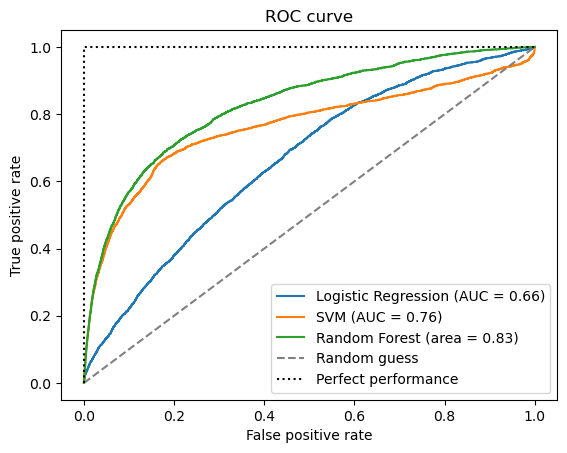

In [23]:
fig, ax = plt.subplots()

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
metrics.RocCurveDisplay.from_estimator(rs_svm, X_test, y_test, ax=ax, name='SVM')
# plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % auc_svm)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1],
         [0, 1],
         'k--',
         label='Random guess',
         color='grey')
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

## Prediction

In [24]:
predict_df_X = pd.read_csv("../data/cs-test.csv", index_col=0).iloc[:, 1:]
predict_df_y = pd.read_csv("../data/sampleEntry.csv", index_col=0)
predict_df_y.loc[predict_df_y['Probability'] >= 0.5, :] = 1
predict_df_y.loc[predict_df_y['Probability'] < 0.5, :] = 0
predict_array_y = predict_df_y['Probability'].astype(int)

X_predict = predict_df_X.values
y_predict = predict_array_y.values

In [25]:
y_predict_lr = gs_lr.predict(X_predict)
y_predict_svm = rs_svm.predict(X_predict)
y_predict_rf = rs_rf.predict(X_predict)

In [26]:
print("Logistic Regression: {}".format(metrics.f1_score(y_predict, y_predict_lr)))
print("SVM: {}".format(metrics.f1_score(y_predict, y_predict_svm)))
print("Random Forest: {}".format(metrics.f1_score(y_predict, y_predict_rf)))

Logistic Regression: 0.13430504945340968
SVM: 0.11876685934489403
Random Forest: 0.195777572681126


Text(0.5, 1.0, 'Confusion matrix of Random Forest')

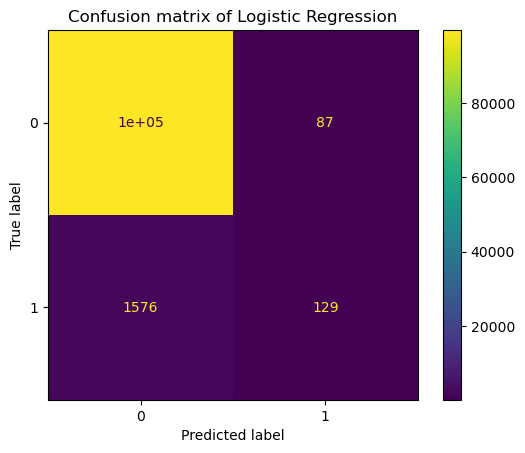

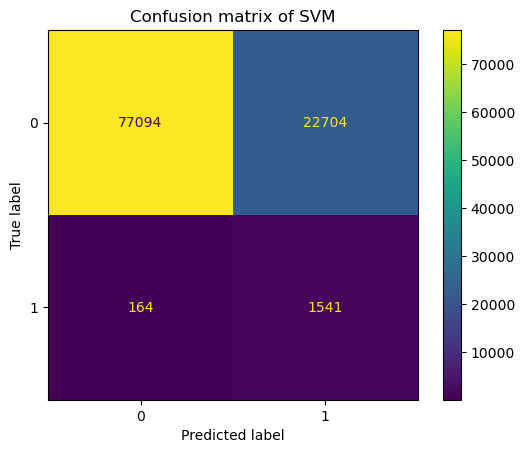

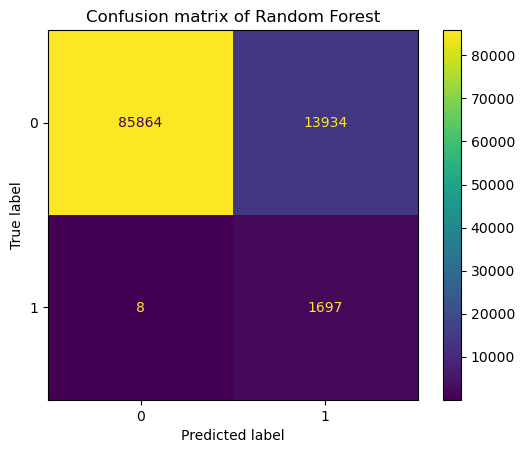

In [27]:
cm_disp_lr = metrics.ConfusionMatrixDisplay.from_predictions(y_predict, y_predict_lr)
cm_disp_svm = metrics.ConfusionMatrixDisplay.from_predictions(y_predict, y_predict_svm)
cm_disp_rf = metrics.ConfusionMatrixDisplay.from_predictions(y_predict, y_predict_rf)
ax_lr = cm_disp_lr.ax_
ax_lr.set_title('Confusion matrix of Logistic Regression')
ax_svm = cm_disp_svm.ax_
ax_svm.set_title('Confusion matrix of SVM')
ax_rf = cm_disp_rf.ax_
ax_rf.set_title('Confusion matrix of Random Forest')

From the above results, we can see that the PCA with `n_components=0.95` combined with random forest classifier with `n_estimators=500`, `max_depth=10` had the best test performance and generalization performance.